In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.model_selection import train_test_split

# 경고 메시지 무시 설정
import warnings
warnings.filterwarnings("ignore")

# 랜덤 시드 설정
SEED = 42
np.random.seed(SEED)

클래스 목록: ['1', '10-1', '10-2', '2', '3', '4', '5', '6', '7', '8', '9']
클래스 수: 11


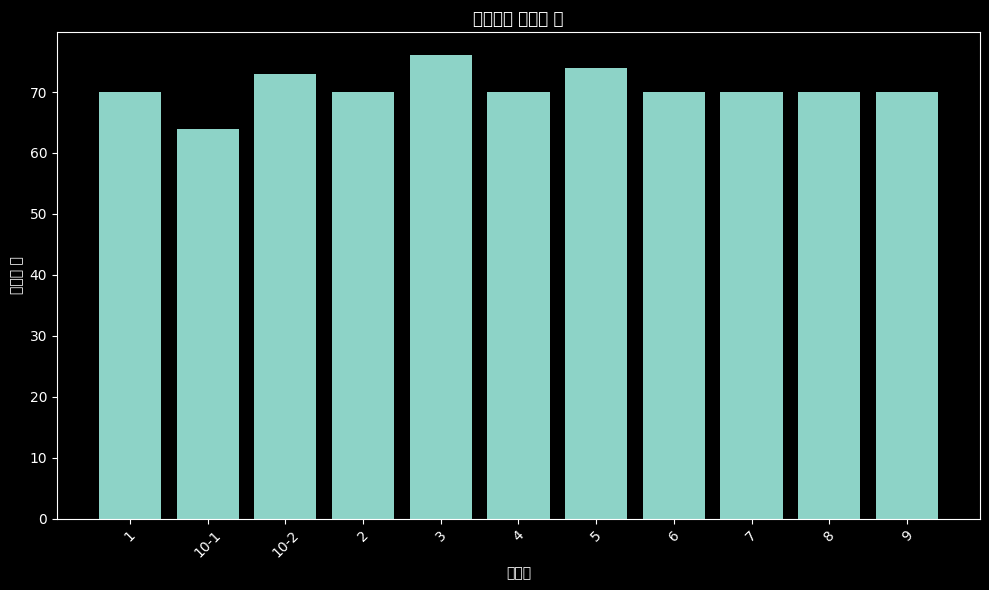

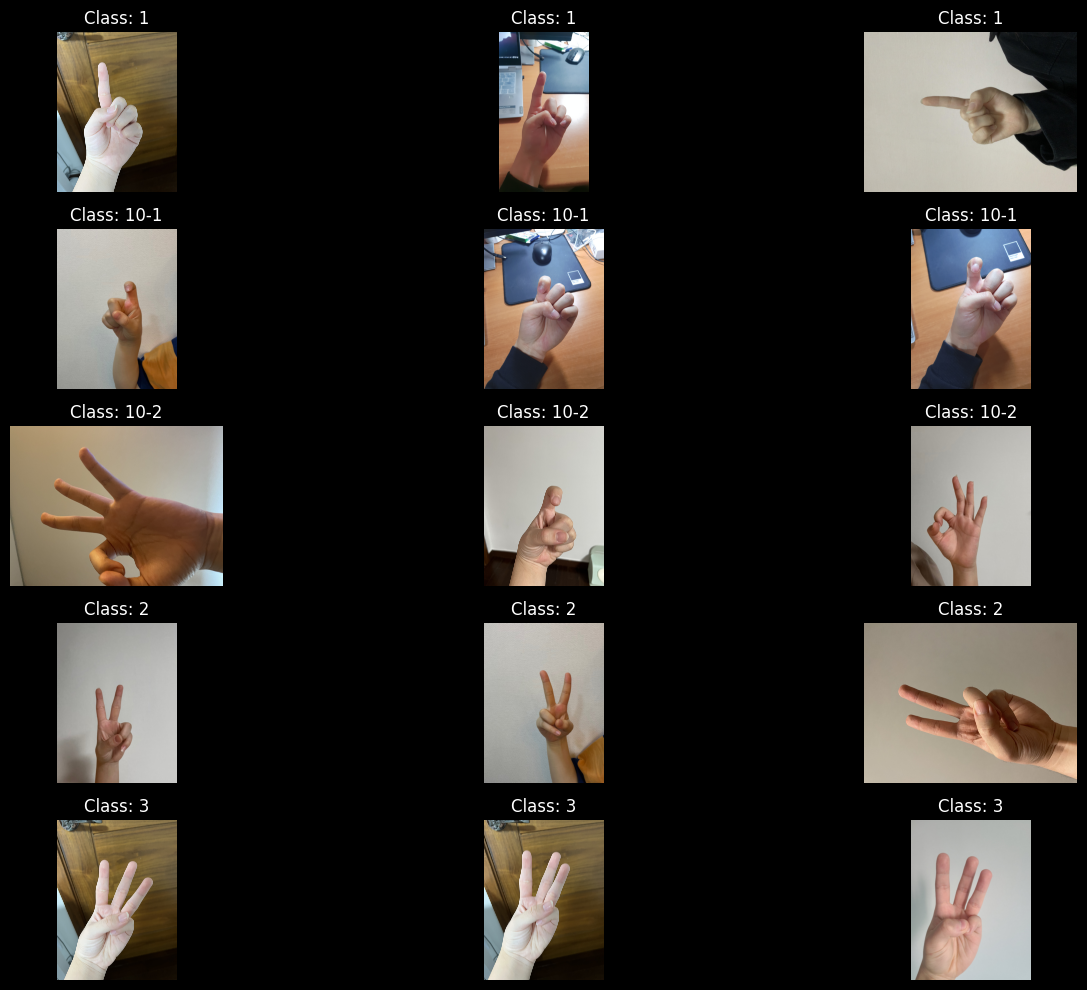

In [2]:
# 데이터 경로 설정
DATA_DIR = 'data'
TRAIN_DIR = os.path.join(DATA_DIR, 'train')
TEST_DIR = os.path.join(DATA_DIR, 'test')

# 클래스 목록 확인
classes = sorted(os.listdir(TRAIN_DIR))
print(f"클래스 목록: {classes}")
print(f"클래스 수: {len(classes)}")

# 각 클래스별 이미지 수 확인
class_counts = {}
for cls in classes:
    class_counts[cls] = len(os.listdir(os.path.join(TRAIN_DIR, cls)))
    
# 데이터 분포 확인
plt.figure(figsize=(10, 6))
plt.bar(class_counts.keys(), class_counts.values())
plt.title('클래스별 이미지 수')
plt.xlabel('클래스')
plt.ylabel('이미지 수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# PIL 이미지 로더 정의
from PIL import Image
import numpy as np

# HEIC 지원 추가 시도 (옵션)
try:
    from pillow_heif import register_heif_opener
    register_heif_opener()
except ImportError:
    print("HEIC 형식을 지원하지 않습니다. 일부 이미지를 불러오지 못할 수 있습니다.")

def load_image(img_path):
    try:
        img = Image.open(img_path).convert('RGB')
        return np.array(img)
    except Exception as e:
        print(f"이미지 로딩 실패: {img_path} - {e}")
        return np.zeros((100, 100, 3), dtype=np.uint8)

# 일반 이미지 형식만 필터링 (선택적)
def is_valid_image(filename):
    valid_extensions = ['.jpg', '.jpeg', '.png', '.bmp']
    ext = os.path.splitext(filename.lower())[1]
    return ext in valid_extensions

# 몇 개의 이미지 시각화
plt.figure(figsize=(15, 10))
for i, cls in enumerate(classes[:5]):  # 첫 5개 클래스만 확인
    class_path = os.path.join(TRAIN_DIR, cls)
    
    sample_images = os.listdir(class_path)[:3]  # 각 클래스당 3개 이미지만 표시
    
    for j, img_name in enumerate(sample_images):
        img_path = os.path.join(class_path, img_name)
        img = load_image(img_path)  # 수정된 이미지 로더 사용
        plt.subplot(5, 3, i*3 + j + 1)
        plt.imshow(img)
        plt.title(f"Class: {cls}")
        plt.axis('off')
        
plt.tight_layout()
plt.show()

클래스 목록: ['1', '10-1', '10-2', '2', '3', '4', '5', '6', '7', '8', '9']
클래스 수: 11


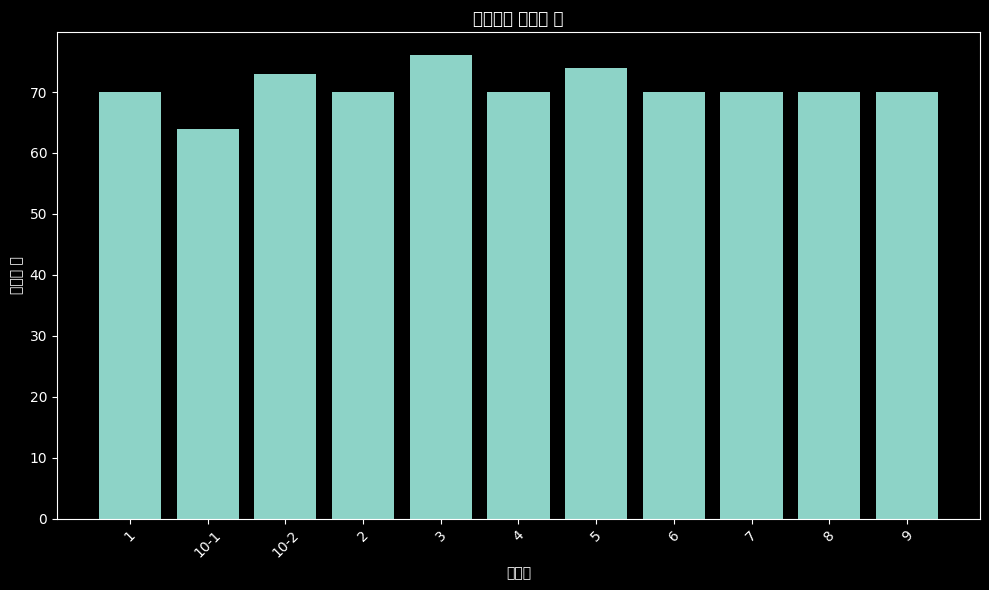

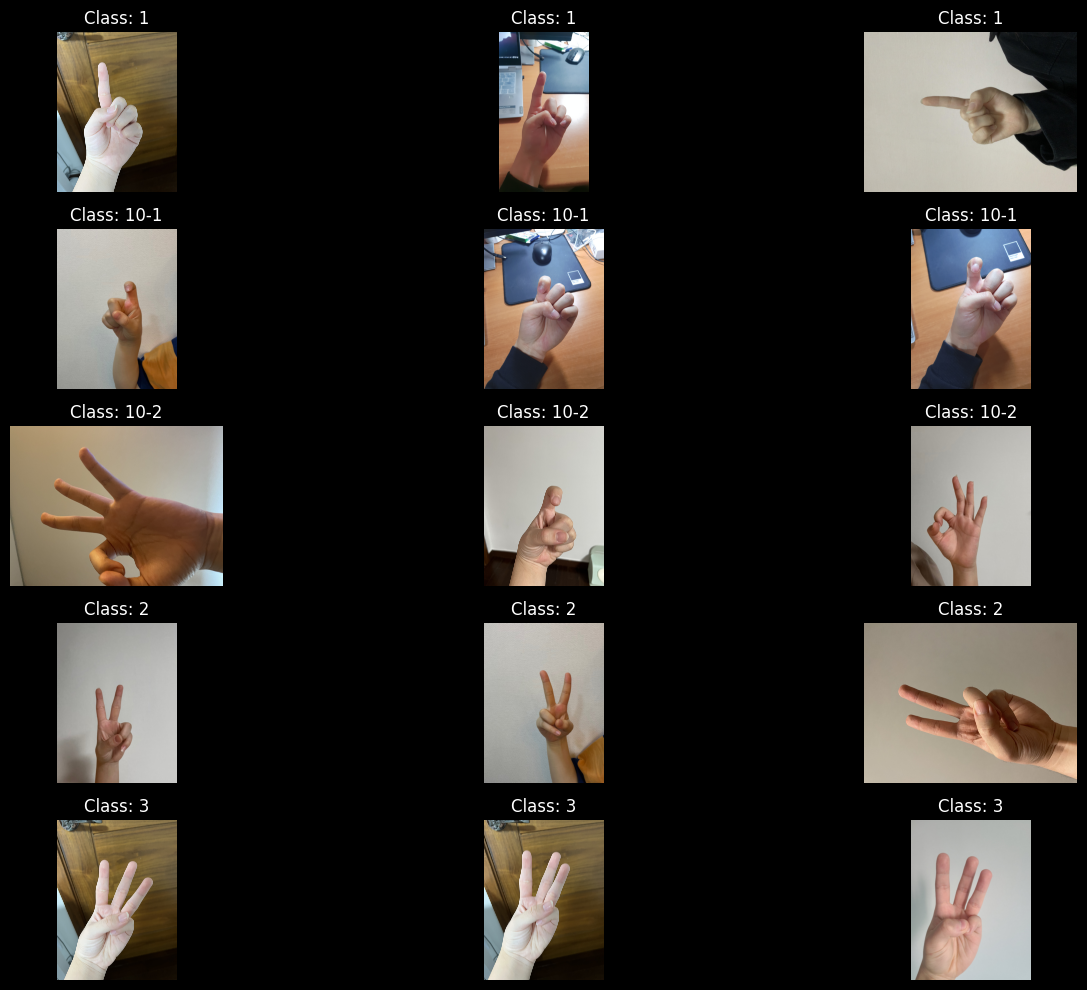

In [3]:
# 데이터 경로 설정
DATA_DIR = 'data'
TRAIN_DIR = os.path.join(DATA_DIR, 'train')
TEST_DIR = os.path.join(DATA_DIR, 'test')

# 클래스 목록 확인
classes = sorted(os.listdir(TRAIN_DIR))
print(f"클래스 목록: {classes}")
print(f"클래스 수: {len(classes)}")

# 각 클래스별 이미지 수 확인
class_counts = {}
for cls in classes:
    class_counts[cls] = len(os.listdir(os.path.join(TRAIN_DIR, cls)))
    
# 데이터 분포 확인
plt.figure(figsize=(10, 6))
plt.bar(class_counts.keys(), class_counts.values())
plt.title('클래스별 이미지 수')
plt.xlabel('클래스')
plt.ylabel('이미지 수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 몇 개의 이미지 시각화
plt.figure(figsize=(15, 10))
for i, cls in enumerate(classes[:5]):  # 첫 5개 클래스만 확인
    class_path = os.path.join(TRAIN_DIR, cls)
    sample_images = os.listdir(class_path)[:3]  # 각 클래스당 3개 이미지만 표시
    
    for j, img_name in enumerate(sample_images):
        img_path = os.path.join(class_path, img_name)
        img = plt.imread(img_path)
        plt.subplot(5, 3, i*3 + j + 1)
        plt.imshow(img)
        plt.title(f"Class: {cls}")
        plt.axis('off')
        
plt.tight_layout()
plt.show()

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# GPU 사용 가능 여부 확인
print("TensorFlow 버전:", tf.__version__)
print("GPU 사용 가능 여부:", len(tf.config.list_physical_devices('GPU')) > 0)

# 이미지 크기 및 배치 크기 설정
IMG_SIZE = 224
BATCH_SIZE = 32

# 데이터 증강 및 전처리
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # 검증 데이터 분리
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

# 학습 및 검증 데이터셋 생성
train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True,
    seed=SEED
)

validation_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),

SyntaxError: incomplete input (3783229961.py, line 40)